In [1]:
import numpy as np
%matplotlib inline

In [2]:
def hypothesis(x, thetas):
    return np.dot(x, thetas)

In [3]:
def cost(x, y, theta):
    m = len(y)
    J = 0
    h = hypothesis(x, theta)
    J = (1/(2 * m)) * np.sum(np.square(h - y))
    return J

In [4]:
def gradientDescent(X, y, alpha, lambda_, iter):
    X1 = X.copy()
    y1 = y.copy()
    m = len(y)
    theta1 = np.ones((X1.shape[1],1))
    theta_history = []
    J_history = []
    
    for i in range(iter):
        h = np.dot(X1, theta1)
        loss = h - y1
        t0 = (1 / m * X1.transpose() @ loss)[0]
        t1 = (1 / m * X1.transpose() @ loss)[1:] - lambda_ / m * theta1[1:]
        
        grad= np.vstack((t0[:,np.newaxis],t1))
        
        theta1 = theta1 - alpha * grad
        
        theta_history.append(theta1)
        J_history.append(cost(X1, y1, theta1))
    return theta_history, J_history

In [31]:
np.random.seed(42)
x = 2 * np.random.rand(100,1).reshape((50, 2))
np.random.seed(41)
y = (4 + 3 * x[:, 0] + 2 *x[:, 1]).reshape((50,1))
x = np.c_[np.ones(len(x)), x]
thetas = np.ones((x.shape[1],1))
x.shape, thetas.shape, y.shape

((50, 3), (3, 1), (50, 1))

In [ ]:
np.random.seed(42)
x = 2 * np.random.rand(100,1)
np.random.seed(41)
y = 4 + 3 * x + 4 * x**2 + np.random.randn(100,1)
x = np.c_[np.ones(len(x)), x, x**2, x**3, x**4]
thetas = np.ones((x.shape[1],1))
x.shape, thetas.shape, y.shape

In [28]:
from numpy import genfromtxt
my_data = genfromtxt('housing_prices.csv', delimiter=',')
x = my_data[:, 0:2]
y = np.reshape(my_data[:, -1], (x.shape[0], 1))
x = np.c_[np.ones(len(x)), x]
thetas = np.ones((x.shape[1],1))
x.shape, y.shape, thetas.shape

((47, 3), (47, 1), (3, 1))

In [32]:
t_hist, c_hist = gradientDescent(x, y, 1e-3, 10, 1000)

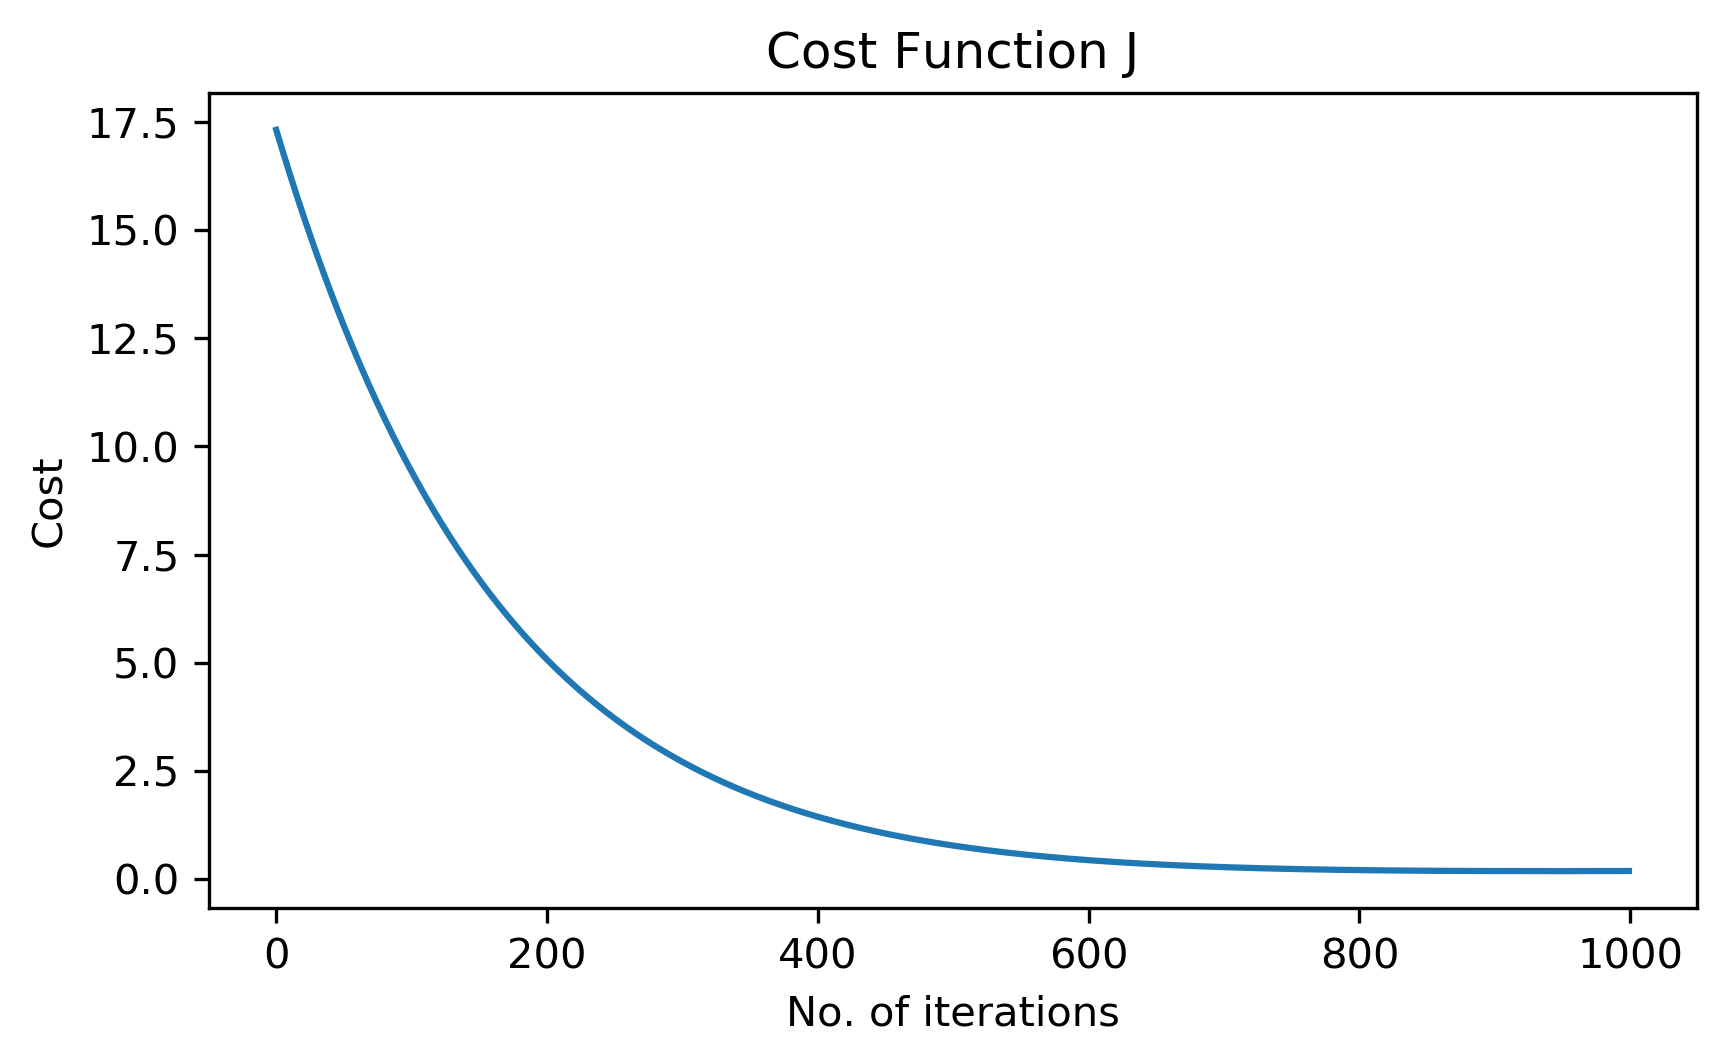

In [34]:
import matplotlib.pyplot as plt
my_dpi=300
plt.figure(figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(c_hist)
plt.savefig('cost.png', dpi=my_dpi)
plt.show()